# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨

## 데이터 불러오기 및 시각화

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [7]:
def plot_iris(iris, labels):
  plt.figure()
  colors = ['navy','purple','red']
  for xy, label in zip(iris, labels):
    plt.scatter(xy[0], xy[1], color=colors[label])

In [17]:
def show_faces(faces):
  plt.figure()
  num_rows, num_cols = 2,3
  for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.reshape(faces[i], (64,64)), cmap=plt.cm.gray)

In [9]:
iris.shape

(150, 4)

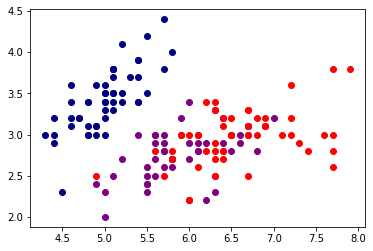

In [10]:
plot_iris(iris[:,:2], labels)

In [13]:
faces.shape

(400, 4096)

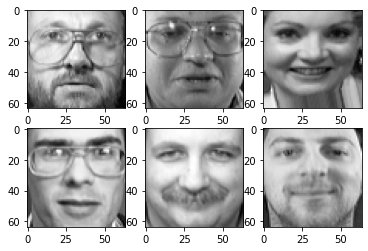

In [18]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA를 사용해 iris 데이터 변환
* $150 \times 4$ 크기의 데이터를 $150 \times 2$ 크기의 행렬로 압축

In [19]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

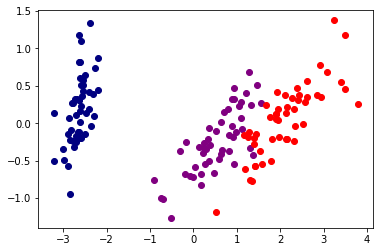

In [20]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [21]:
model = PCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

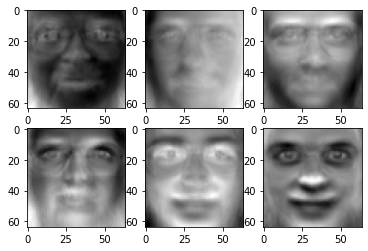

In [22]:
show_faces(faces_components)

## Incremental PCA

* PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

In [23]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

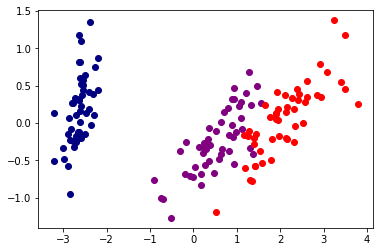

In [24]:
plot_iris(transformed_iris, labels)

In [26]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

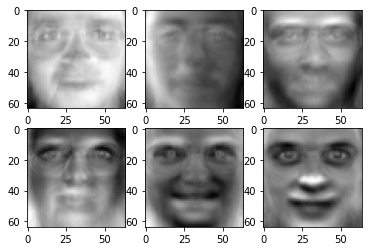

In [27]:
show_faces(faces_components)

## Kernel PCA

* 차원 축소를 위한 복잡한 비선형 투형

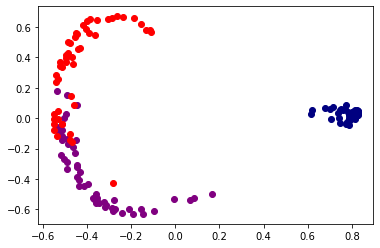

In [30]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [31]:
model = KernelPCA(n_components=2*3, kernel='rbf', random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)
# kernel pca 에서는 components를 돌려주지않으므로 결과가 나오지않음

AttributeError: ignored

## Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점
* 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

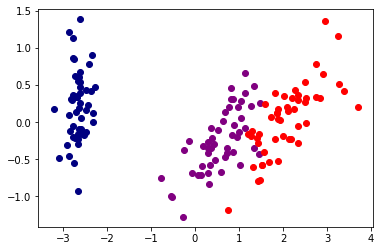

In [33]:
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

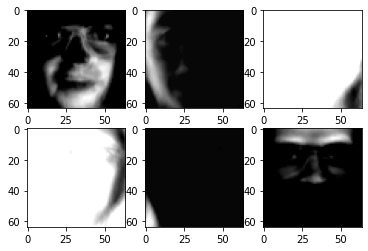

In [35]:
model = SparsePCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Truncated Singular Value Decomposition (Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

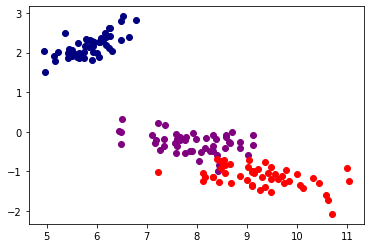

In [37]:
model = TruncatedSVD(n_components=2 ,random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

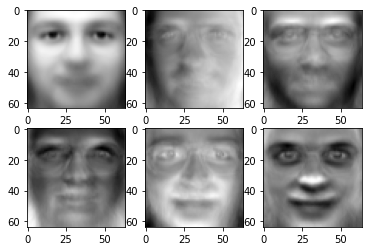

In [39]:
model = TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

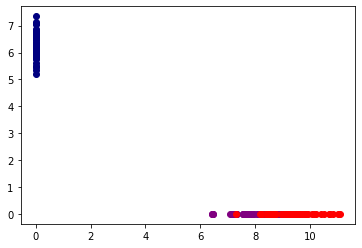

In [40]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

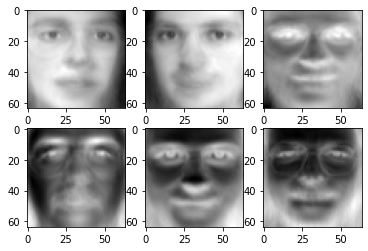

In [41]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려

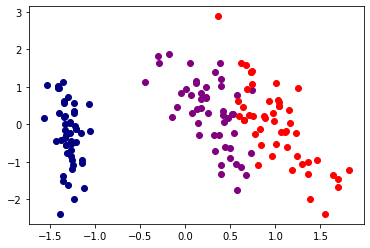

In [42]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

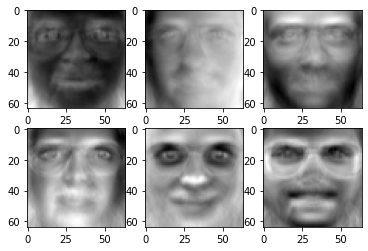

In [43]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

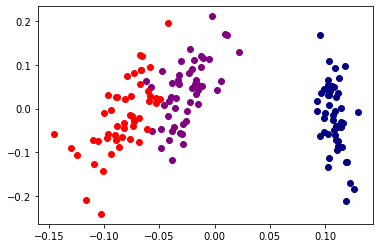

In [44]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

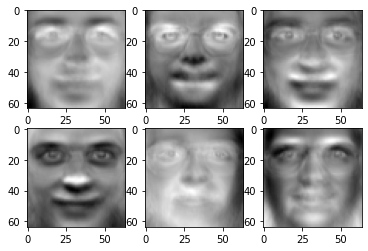

In [45]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


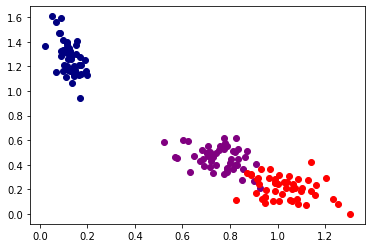

In [46]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


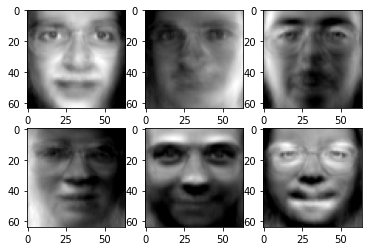

In [47]:
model = NMF(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


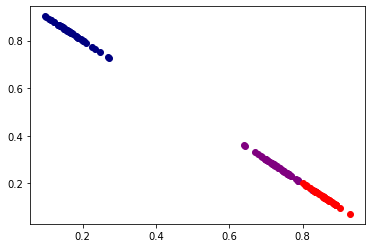

In [48]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

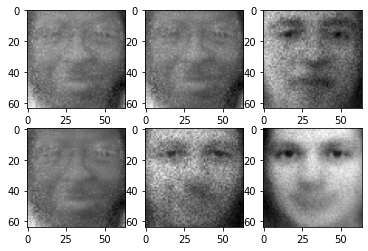

In [49]:
model = LatentDirichletAllocation (n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스르 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

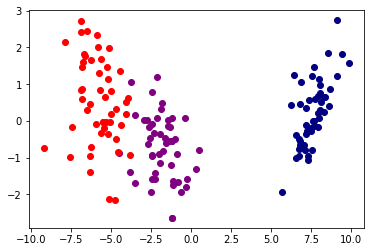

In [51]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [53]:
def min_max_scale(x):
  min_value, max_value = np.min(x,0), np.max(x,0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [63]:
def plot_digits(digits, labels):
  digits = min_max_scale(digits)
  ax = plt.subplot(111, projection='3d')
  for i in range(digits.shape[0]):
    ax.text(digits[i,0], digits[i,1], digits[i,2],
            str(labels[i]), color=plt.cm.Set1(labels[i] / 10.),
            fontdict={'weight':'bold','size':9})
  ax.view_init(4,-72)

In [55]:
digits = load_digits()

In [59]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

In [60]:
print(digits.data.shape)

print(decomposed_digits.shape)
print(decomposed_digits)

(1797, 64)
(1797, 3)
[[0.48392621 0.         1.24523916]
 [0.5829615  1.46767565 0.07150889]
 [0.61515882 1.10963211 0.38778201]
 ...
 [0.55272665 1.26056523 0.72094741]
 [0.7872562  0.27898731 1.04952031]
 [0.78507412 0.67250886 0.92677985]]


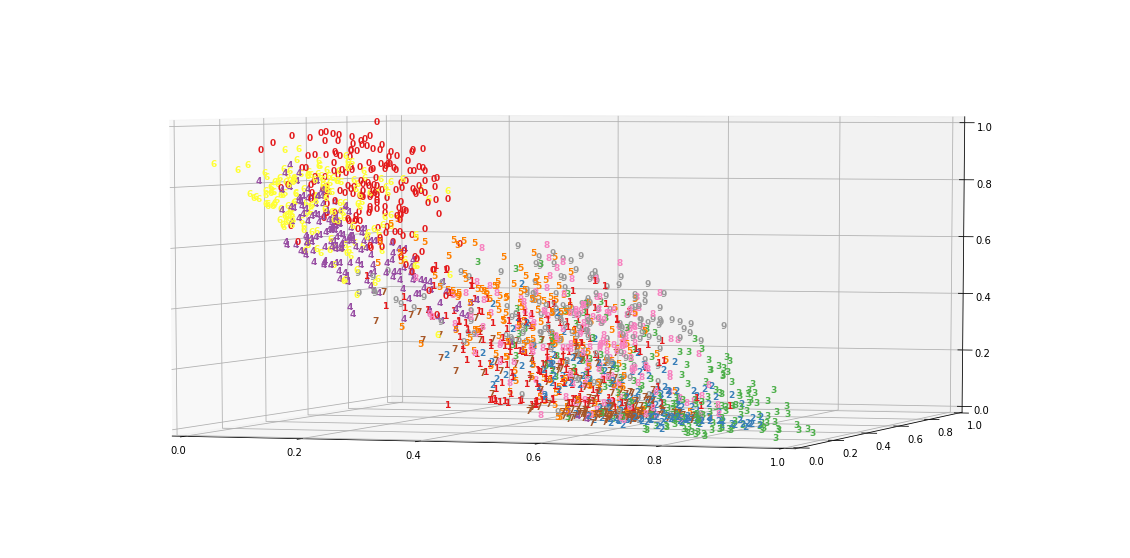

In [64]:
plt.figure(figsize=(20,10))
plot_digits(decomposed_digits, digits.target)

### KNN

In [65]:
knn = KNeighborsClassifier()

In [67]:
score = cross_val_score(
    estimator=knn,
    X=digits.data, y=digits.target, cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [68]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.9627282575054161 (+/-) 0.011168537355954218


In [69]:
score = cross_val_score(
    estimator=knn,
    X=decomposed_digits, y=digits.target, cv=5
)
score

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

In [70]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.5854441349427422 (+/-) 0.03214521445075084


### SVM

In [71]:
svm =SVC()

In [72]:
score = cross_val_score(
    estimator=svm,
    X=digits.data, y=digits.target, cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [73]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.9632838130609718 (+/-) 0.02008605863225686


In [74]:
score = cross_val_score(
    estimator=svm,
    X=decomposed_digits, y=digits.target, cv=5
)
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

In [75]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.6193670690188796 (+/-) 0.022070024720937543


### Decision Tree

In [76]:
decision_tree = DecisionTreeClassifier()

In [77]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits.data, y=digits.target, cv=5
)
score

array([0.74722222, 0.72222222, 0.79387187, 0.82729805, 0.7994429 ])

In [78]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.7780114515629836 (+/-) 0.03794849973136835


In [79]:
score = cross_val_score(
    estimator=decision_tree,
    X=decomposed_digits, y=digits.target, cv=5
)
score

array([0.57777778, 0.50277778, 0.57660167, 0.58495822, 0.50696379])

In [80]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.5498158464871556 (+/-) 0.03683263508320529


### Random Forest

In [81]:
random_forest = RandomForestClassifier()

In [82]:
score = cross_val_score(
    estimator=random_forest,
    X=digits.data, y=digits.target, cv=5
)
score

array([0.92777778, 0.9       , 0.96100279, 0.96100279, 0.91922006])

In [83]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.933800680903745 (+/-) 0.023963576583019872


In [84]:
score = cross_val_score(
    estimator=random_forest,
    X=decomposed_digits, y=digits.target, cv=5
)
score

array([0.55555556, 0.59722222, 0.64623955, 0.57938719, 0.55153203])

In [85]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.5859873104302074 (+/-) 0.03439004387549752


## 복원된 표현을 사용한 학습
* 분해 후 복원된 행렬을 사용해 학습

In [88]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components
reconstructed_digits.shape

(1797, 64)

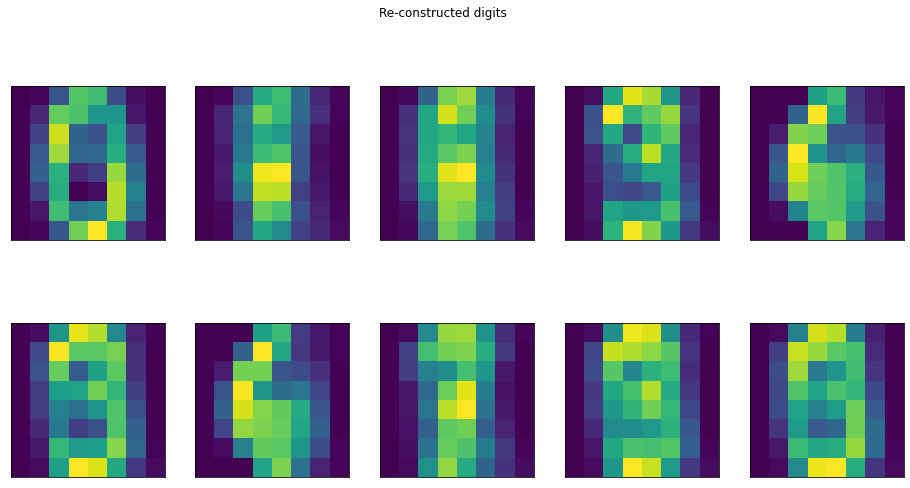

In [90]:
plt.figure(figsize=(16,8))
plt.suptitle('Re-constructed digits')
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(reconstructed_digits[i].reshape(8,8))

### KNN

In [91]:
score = cross_val_score(
    estimator=knn,
    X=reconstructed_digits, y=digits.target, cv=5
)
score

array([0.54166667, 0.59444444, 0.66295265, 0.57660167, 0.57381616])

In [92]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.5898963169297431 (+/-) 0.04029722337499952


### SVM

In [93]:
score = cross_val_score(
    estimator=svm,
    X=reconstructed_digits, y=digits.target, cv=5
)
score

array([0.62777778, 0.60555556, 0.66016713, 0.61002786, 0.5821727 ])

In [94]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.6171402042711235 (+/-) 0.025969174809053776


### Decision Tree

In [95]:
score = cross_val_score(
    estimator=decision_tree,
    X=reconstructed_digits, y=digits.target, cv=5
)
score

array([0.54722222, 0.525     , 0.54874652, 0.56824513, 0.53760446])

In [96]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.5453636645001547 (+/-) 0.014236174496630538


### Random Forest

In [97]:
score = cross_val_score(
    estimator=random_forest,
    X=reconstructed_digits, y=digits.target, cv=5
)
score

array([0.575     , 0.58055556, 0.65181058, 0.60445682, 0.57381616])

In [98]:
print('mean cross_val score: {} (+/-) {}'.format(score.mean(), score.std()))

mean cross_val score: 0.5971278242030331 (+/-) 0.029501298738725656


## 이미지 복원

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

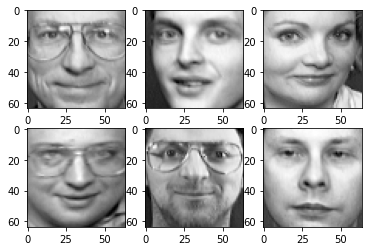

In [112]:
show_faces(train_faces)

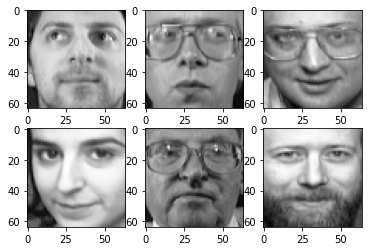

In [113]:
show_faces(test_faces)

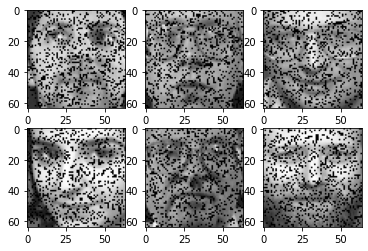

In [124]:
damaged_faces = []
for face in test_faces:
  idx = np.random.choice(range(64 * 64), size=1024)
  damaged_face = face.copy()
  damaged_face[idx] = 0.
  damaged_faces.append(damaged_face)

images = np.asarray(damaged_faces, dtype=np.float32)
show_faces(images)

In [121]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10)

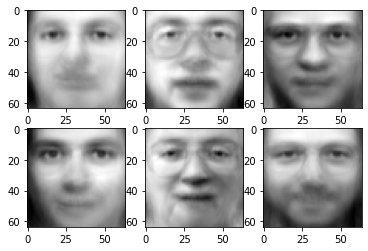

In [125]:
matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [126]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=100)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


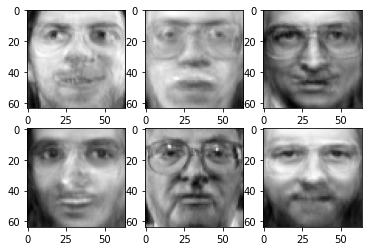

In [127]:
matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


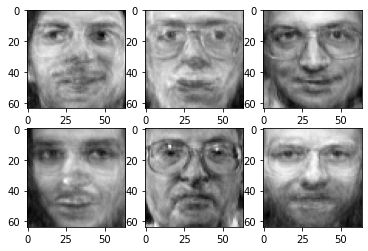

In [128]:
nmf = NMF(n_components=300)
nmf.fit(train_faces)

matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)